<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/choosing_sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choosing an NDW sensor on A2

We will be using TensorFlow 2.0 with Keras integration, but for now, let us make some plots to find a suitable sensor to play with.

We import necessary libraries as we go, but we should install the latest version of folium right away, so we do not have to restart our runtime later on.



In [0]:
# also let's ignore warnings as warnings just get in the way of a pretty noteboook :)
import warnings
warnings.filterwarnings('ignore')

In [28]:
# install latest version of folium
!pip install git+https://github.com/python-visualization/folium

  Cloning https://github.com/python-visualization/folium to /tmp/pip-req-build-y0gdhxxx
  Running command git clone -q https://github.com/python-visualization/folium /tmp/pip-req-build-y0gdhxxx
  Created wheel for folium: filename=folium-0.10.0+2.g60ae79c-py2.py3-none-any.whl size=91399 sha256=a5ac522e0b0dc0f913fc6ca5ff47de0fe81e1b8351589b38b95c39039f8c53b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-gfnscr2f/wheels/1e/e1/75/ecbc91fd5dd5d90befb0b533bf7492d38acffa033310731862
Successfully built folium


In [3]:
# make sure the version is now 0.10.x or newer
import folium
print(folium.__version__)

0.10.0+2.g60ae79c


No we can get started mounting our GDrive.
Follow the link when prompted and copy-paste the string from the new tab to authenticate.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set a working directory. Default is your top-level GDrive folder.

In [5]:
%cd '/content/drive/My Drive/'

/content/drive/My Drive


Now we will copy the dataset containing sensor information. 

NDW sensors with an ID conforming to the pattern _RWS01_MONIBAS_0021hrl04\*\*ra_ are included in the data (\* being the wildcard).

This set of sensors is found on a stretch of the northbound A2 between Utrecht and Amsterdam.

For this we need to import some PyDrive tools.
Follow the link when prompted and copy-paste the string from the new tab to authenticate.


In [0]:
# Code to read csv file into Colaboratory:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
id = '1Dwe5Xfa1yXCswLvzodFdN8P7F6WUCYFu' # the GDrive file ID of the shared csv
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('4monthsA2.csv')  
df = pd.read_csv('4monthsA2.csv') # Dataset is now stored in a Pandas Dataframe

Now that we have the data, we should explore it.

In this dataframe, the temporal resolution is one minute. 'volume' is the number of vehicles per minute, while 'speed_avg' is the average vehicle speed per minute. The time period covered is 01-06-2019 to 30-09-2019.

In [8]:
# show dataframe info
print(df.info(null_counts=True))
# set option to stop pandasd from truncating or wrapping columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
# print first 20 rows
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509990 entries, 0 to 3509989
Data columns (total 7 columns):
Unnamed: 0    3509990 non-null int64
sensor_id     3509990 non-null object
date          3509990 non-null object
volume        3509990 non-null int64
speed_avg     3509990 non-null int64
lon           3509990 non-null float64
lat           3509990 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 187.5+ MB
None
   Unnamed: 0                    sensor_id                       date  volume  speed_avg      lon       lat
0  0           RWS01_MONIBAS_0021hrl0469ra  2019-09-30 22:44:00+02:00  0       0          4.98704  52.19643
1  1           RWS01_MONIBAS_0021hrl0469ra  2019-09-30 22:43:00+02:00  31      122        4.98704  52.19643
2  2           RWS01_MONIBAS_0021hrl0469ra  2019-09-30 22:42:00+02:00  22      113        4.98704  52.19643
3  3           RWS01_MONIBAS_0021hrl0469ra  2019-09-30 22:41:00+02:00  31      121        4.98704  52.19643
4  4          

In [9]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True) # we have no need for this column as it's simply a mirror of the index
df.columns

Index(['sensor_id', 'date', 'volume', 'speed_avg', 'lon', 'lat'], dtype='object')

Our dataframe doesn't have any null values, which is a bit suspicious. 

Let us therefore take a look at the statistics grouped by sensor_id.

In [10]:
pd.options.display.float_format = '{:.2f}'.format
df.groupby(['sensor_id']).describe()

volume                                           speed_avg                                                    lon                                          lat                                         
                                count  mean   std  min   25%   50%   75%    max     count   mean   std  min   25%    50%    75%    max     count mean  std  min  25%  50%  75%  max     count  mean  std   min   25%   50%   75%   max
sensor_id                                                                                                                                                                                                                             
RWS01_MONIBAS_0021hrl0403ra 159545.00 63.20 43.86 0.00 21.00 64.00 95.00 248.00 159545.00 104.15 14.99 0.00 98.00 100.00 115.00 180.00 159545.00 4.97 0.00 4.97 4.97 4.97 4.97 4.97 159545.00 52.25 0.00 52.25 52.25 52.25 52.25 52.25
RWS01_MONIBAS_0021hrl0409ra 159545.00 63.04 43.78 0.00 21.00 64.00 95.00 238.00 159545.00 104.31 14.59 0.00 98.00 100.00 115.00 180.00 159545.00 4.97 0.00 4.97 4.97 4.97 4.97 4.97 159545.00 52.25 0.00 52.25 52.25 52.25 52.25 52.25
RWS01_MONIBAS_0021hrl0414ra 159545.00 63.08 43.82 0.00 21.00 64.00 95.00 237.00 159545.00 104.25 14.35 0.00 98.00 100.00 115.00 184.00 159545.00 4.97 0.00 4.97 4.97 4.97 4.97 4.97 159545.00 52.24 0.00 52.24 52.24 52.24 52.24 52.24
RWS01_MONIBAS_0021hrl0420ra 159545.00 63.06 43.86 0.00 21.00 64.00 95.00 235.00 159545.00 104.24 14.42 0.00 98.00 100.00 115.00 157.00 159545.00 4.98 0.00 4.98 4.98 4.98 4.98 4.98 159545.00 52.24 0.00 52.24 52.24 52.24 52.24 52.24
RWS01_MONIBAS_0021hrl0426ra 159545.00 62.97 43.82 0.00 21.00 63.00 95.00 249.00 159545.00 104.49 14.34 0.00 98.00 101.00 115.00 173.00 159545.00 4.98 0.00 4.98 4.98 4.98 4.98 4.98 159545.00 52.23 0.00 52.23 52.23 52.23 52.23 52.23
RWS01_MONIBAS_0021hrl0432ra 159545.00 0.00  0.13  0.00 0.00  0.00  0.00  50.00  159545.00 0.00   0.25  0.00 0.00  0.00   0.00   99.00  159545.00 4.98 0.00 4.98 4.98 4.98 4.98 4.98 159545.00 52.23 0.00 52.23 52.23 52.23 52.23 52.23
RWS01_MONIBAS_0021hrl0435ra 159545.00 55.01 38.17 0.00 18.00 55.00 83.00 234.00 159545.00 104.89 14.12 0.00 99.00 102.00 115.00 173.00 159545.00 4.98 0.00 4.98 4.98 4.98 4.98 4.98 159545.00 52.23 0.00 52.23 52.23 52.23 52.23 52.23
RWS01_MONIBAS_0021hrl0438ra 159545.00 53.22 38.66 0.00 16.00 52.00 82.00 219.00 159545.00 100.01 22.81 0.00 98.00 100.00 113.00 188.00 159545.00 4.99 0.00 4.99 4.99 4.99 4.99 4.99 159545.00 52.22 0.00 52.22 52.22 52.22 52.22 52.22
RWS01_MONIBAS_0021hrl0441ra 159545.00 60.57 41.57 0.00 20.00 61.00 91.00 237.00 159545.00 103.12 14.07 0.00 97.00 100.00 114.00 145.00 159545.00 4.99 0.00 4.99 4.99 4.99 4.99 4.99 159545.00 52.22 0.00 52.22 52.22 52.22 52.22 52.22
RWS01_MONIBAS_0021hrl0447ra 159545.00 60.34 41.35 0.00 20.00 61.00 91.00 222.00 159545.00 104.39 13.76 0.00 98.00 100.00 115.00 188.00 159545.00 4.99 0.00 4.99 4.99 4.99 4.99 4.99 159545.00 52.22 0.00 52.22 52.22 52.22 52.22 52.22
RWS01_MONIBAS_0021hrl0452ra 159545.00 60.31 41.36 0.00 20.00 61.00 91.00 232.00 159545.00 104.19 13.84 0.00 98.00 100.00 115.00 188.00 159545.00 4.99 0.00 4.99 4.99 4.99 4.99 4.99 159545.00 52.21 0.00 52.21 52.21 52.21 52.21 52.21
RWS01_MONIBAS_0021hrl0459ra 159545.00 60.45 41.46 0.00 20.00 61.00 91.00 224.00 159545.00 104.16 14.00 0.00 98.00 100.00 115.00 161.00 159545.00 4.99 0.00 4.99 4.99 4.99 4.99 4.99 159545.00 52.21 0.00 52.21 52.21 52.21 52.21 52.21
RWS01_MONIBAS_0021hrl0464ra 159545.00 60.52 41.59 0.00 20.00 61.00 91.00 255.00 159545.00 104.50 13.97 0.00 98.00 100.00 115.00 184.00 159545.00 4.99 0.00 4.99 4.99 4.99 4.99 4.99 159545.00 52.20 0.00 52.20 52.20 52.20 52.20 52.20
RWS01_MONIBAS_0021hrl0469ra 159545.00 60.60 41.61 0.00 20.00 61.00 91.00 224.00 159545.00 104.72 13.47 0.00 98.00 100.00 115.00 184.00 159545.00 4.99 0.00 4.99 4.99 4.99 4.99 4.99 159545.00 52.20 0.00 52.20 52.20 52.20 52.20 52.20
RWS01_MONIBAS_0021hrl0475ra 159545.00 43.31 31.59 0.00 13.00 42.00 65.00 179.00 159545.00 104.12 15.78 0

The mean volume and speed taken over the whole period for 'RWS01_MONIBAS_0021hrl0432ra' is 0. That means:

1) We should be on the lookout for 0 values as they may really represent null values, suggesting that a sensor is not operating properly.

2) We can discard 'RWS01_MONIBAS_0021hrl0432ra'.

&nbsp;

Before we get into that, let us visualize the sensors in space.

In [11]:
# import statistics for statistical methods
import statistics
# import folim module for interactive mapping
import folium

# the sensors roughly run south-north, so taking the median lat/lon values will give us a coordinate somewhere in the middle to center our map around
map_center = [statistics.median(lat for lat in df.lat.unique()), statistics.median(lon for lon in df.lon.unique())]


def generateBaseMap(location=map_center, zoom_start=12):
    # creates a basemap centered around input coordinates
    base_map = folium.Map(location=location, control_scale=True, zoom_start=zoom_start)
    return base_map

# run the function
m = generateBaseMap()

# get a dataframe of total volume and mean speed per sensor for the whole period
points_df = pd.DataFrame(df.groupby('sensor_id', as_index=False)['lat','lon','speed_avg'].mean())
points_df['total_volume'] = df.groupby('sensor_id', as_index=False)['volume'].sum()['volume']

def addMarkers(map):
    for i in range(0, len(points_df)):
        """create color-coded markers with informative pop-ups"""

        # add sensor_id in tooltip
        tooltip = f"{points_df.loc[points_df.index[i], 'sensor_id']}"
        # add sensor information to pop-up
        popup = (f"<b>{points_df.iloc[i, 0]}</b><br>"
                f"Coordinates: ({points_df.iloc[i, 1]:.4f}, {points_df.iloc[i, 2]:.4f})<br>"
                f"Mean speed: {points_df.iloc[i, 3]:.2f} kph<br>"
                f"Total volume: {points_df.iloc[i, 4]:,} vehicles")
        # grab point coords from points_df
        point = (points_df.loc[points_df.index[i], 'lat'], points_df.loc[points_df.index[i], 'lon'])
        
        if points_df.loc[points_df.index[i], 'speed_avg'] > 1:
            # make marker blue if sensor works
            folium.Marker(location = point, popup = popup, tooltip = tooltip, icon=folium.Icon(prefix='glyphicon', icon = 'ok', color='blue')).add_to(map)
        else:
            # make marker red if sensor is broken
            folium.Marker(location = point, popup = popup, tooltip = tooltip, icon=folium.Icon(prefix='glyphicon', icon = 'remove', color='red')).add_to(map)

# show map
addMarkers(m)
m

Now that we know what we are dealing with, it is time to start diving more deeply into the data. 

A good way to get a better sense of the data is through plotting. For this we need some extra libraries.

In [0]:
# matplotlib forms the basis for visualization in Python
import matplotlib.pyplot as plt

# we will use the Seaborn library
import seaborn as sns
sns.set()

# and the Plotly library
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "colab"

# graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 

# increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['image.cmap'] = 'viridis'

Now make a distribution plot of the speed.

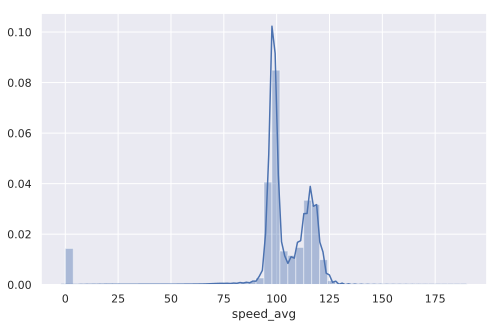

In [13]:
# first copy the original df
df_original = df.copy()
# plot distribution of speed
sns.distplot(df['speed_avg'])

It looks like we may have forgotten to remove the broken sensor.

In [0]:
# remove observations from the broken sensor
df = df.drop(df[df.sensor_id == 'RWS01_MONIBAS_0021hrl0432ra'].index)

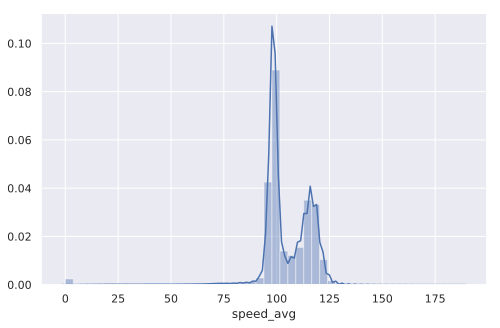

In [15]:
# plot distribution of speed
sns.distplot(df['speed_avg'])

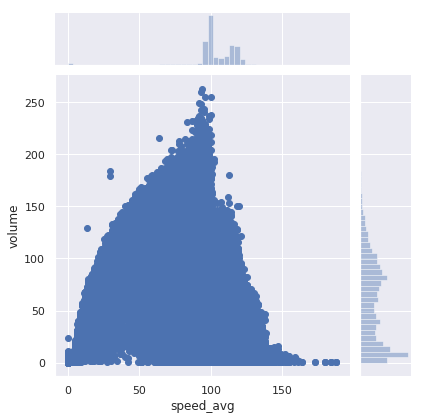

In [16]:
# set fig format to png since svg is quite heavy on the processor for this plot
%config InlineBackend.figure_format = 'png'
# plot jointplot
sns.jointplot(x='speed_avg', y='volume', 
              data=df, kind='scatter')

In [17]:
# back to svg
%config InlineBackend.figure_format = 'svg'
# plot boxplot
sns.boxplot(y="sensor_id", x="speed_avg", 
            data=df, orient="h")

In [0]:
from scipy import signal

sorted = df.sort_values('date', axis = 0, ascending = True)

for idx, sensor in enumerate(df.sensor_id.unique()):
    if idx < 1:
        fig = go.Figure(data=go.Scatter(x=sorted[sorted['sensor_id'] == sensor].date,
        y=signal.savgol_filter(sorted[sorted['sensor_id'] == sensor].speed_avg,
                                                                          1339, # window length
                                                                          3 # polynomial order
    )))
    else:
        fig.add_trace(go.Scatter(x=sorted[sorted['sensor_id'] == sensor].date,
        y=signal.savgol_filter(sorted[sorted['sensor_id'] == sensor].speed_avg,
                                                                          1339, # window length
                                                                          3 # polynomial order
    )))

fig.show()

In [0]:
sorted2 = sorted.copy()
sorted2['speed_avg'] = signal.savgol_filter(sorted2[])sorted = df.sort_values('date', axis = 0, ascending = True)


fig = px.line(sorted, x="date", y=signal.savgol_filter(sorted.speed_avg,
                                                                    1339, # window length
                                                                    3 # polynomial order
    ), color="sensor_id",
              line_group="sensor_id", hover_name="sensor_id")
fig.show()